# Perform GRN analysis
**Authorship:** Adam Klie (last updated: 08/01/2023)<br>
***
**Description:** This notebook takes in an h5ad file with raw counts in it and will preprocess it for CellOracle.
***

In [12]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [13]:
import celloracle as co
co.__version__

which: no R in (/cm/local/apps/environment-modules/4.4.0//bin:/cellar/users/aklie/opt/google-cloud-sdk/bin:/cellar/users/aklie/opt/miniconda3/bin:/cellar/users/aklie/opt/miniconda3/condabin:/cellar/users/aklie/opt/meme/bin:/cellar/users/aklie/opt/meme/libexec/meme-5.5.0:/cellar/users/aklie/opt/apache-ant-1.10.12/bin:/cellar/users/aklie/opt/deltasvm_script/deltasvm.pl:/cellar/users/aklie/opt/lsgkm-svr/bin:/cellar/users/aklie/opt/gatk-4.2.6.1:/cellar/users/mpagadal/Programs/PRSICE/PRSice.R:/cellar/users/aklie/opt/plink:/cellar/users/aklie/opt/plink2:/cellar/users/aklie/opt/confusion_matrix:/cellar/users/aklie/bin/motif_finding.sh:/cellar/users/aklie/opt/edirect:/cellar/users/aklie/opt/ucsc:/cellar/users/mpagadal/Programs/bcftools-1.11:/cellar/users/aklie/opt/homer/bin:/cellar/users/aklie/opt/Gene2vec/src:/cellar/users/aklie/opt:/cellar/users/aklie/.local/bin:/cellar/users/aklie/opt/cellranger-7.1.0:/cellar/users/aklie/opt/ml4gland/basenji/bin:/cm/local/apps/jupyter-submit:/cm/shared/apps

'0.14.0'

In [14]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [4]:
save_folder = "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/celloracle/results/igvf_b01_LeftCortex"
os.makedirs(save_folder, exist_ok=True)

In [5]:
links = co.load_hdf5(os.path.join(save_folder, "Microglia_links.celloracle.links"))

# Network preprocessing

In [22]:
links.links_dict["B6J"].sort_values("p")

,source,target,coef_mean,coef_abs,p,-logp
28419,Foxc1,Slc7a4,0.001161,0.001161,1.492259e-34,33.826156
6311,Pax5,Chst3,0.001027,0.001027,6.214792e-32,31.206573
7878,Ahr,Dab2,0.148600,0.148600,1.186648e-30,29.925678
19394,Rbpj,Ms4a7,0.023404,0.023404,1.422257e-30,29.847022
10308,Ahr,F13a1,0.177212,0.177212,1.754390e-30,29.755874
...,...,...,...,...,...,...
34977,Plag1,Zfp819,0.000000,0.000000,NaN,-0.000000
34978,Zbtb7a,Zfp819,0.000000,0.000000,NaN,-0.000000
34979,Mnt,Zfp819,0.000000,0.000000,NaN,-0.000000
34980,Mlxipl,Zfp819,0.000000,0.000000,NaN,-0.000000


In [6]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)

In [7]:
plt.rcParams["figure.figsize"] = [9, 4.5]

B6J


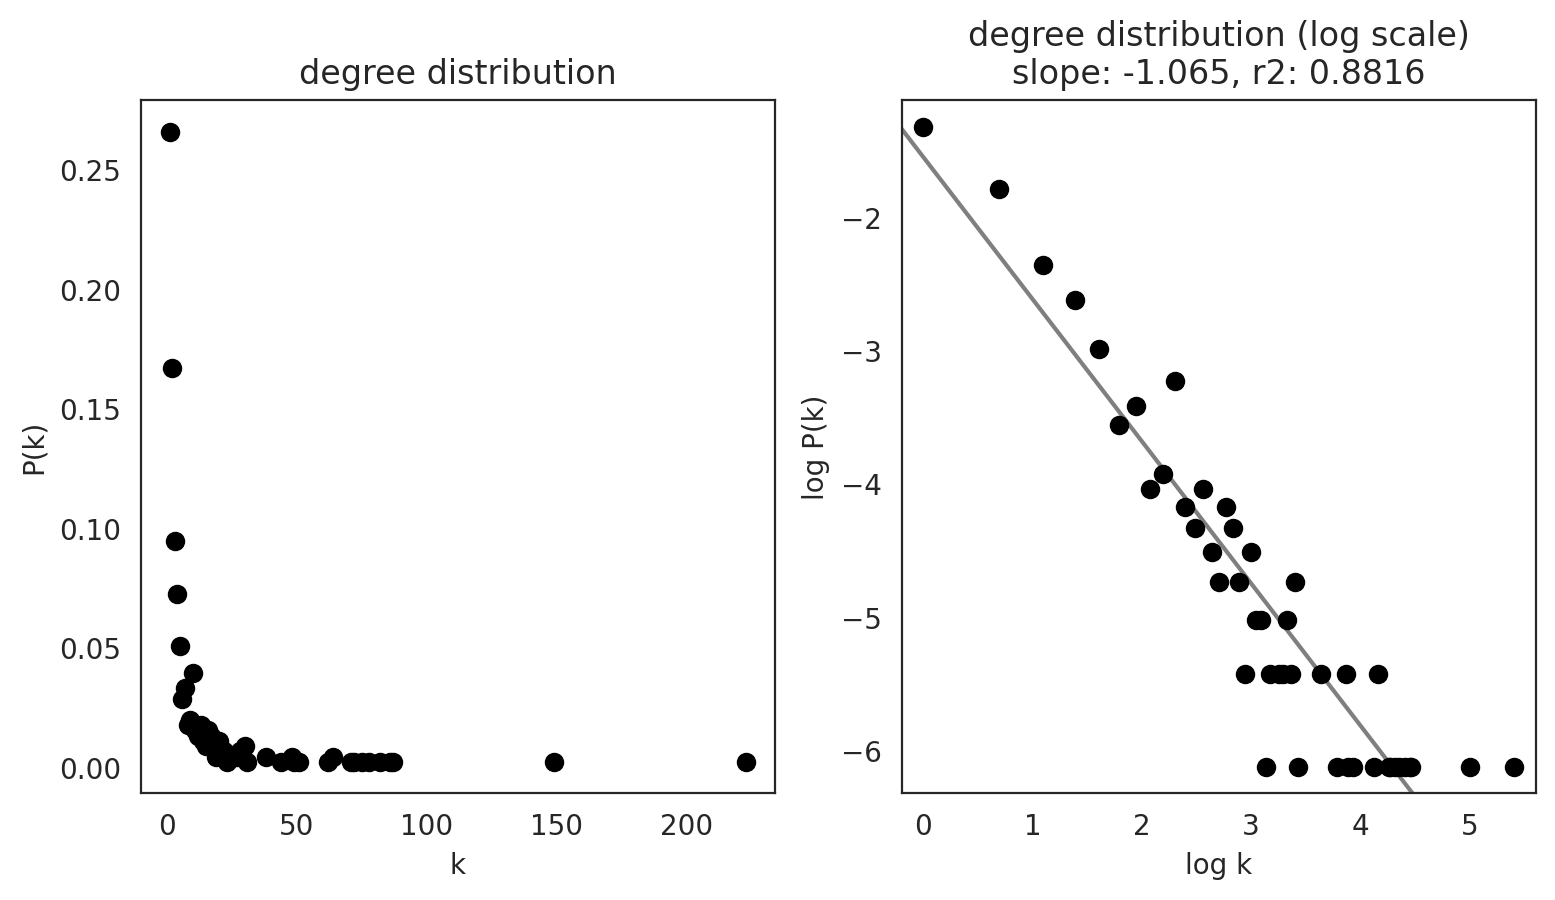

CASTJ


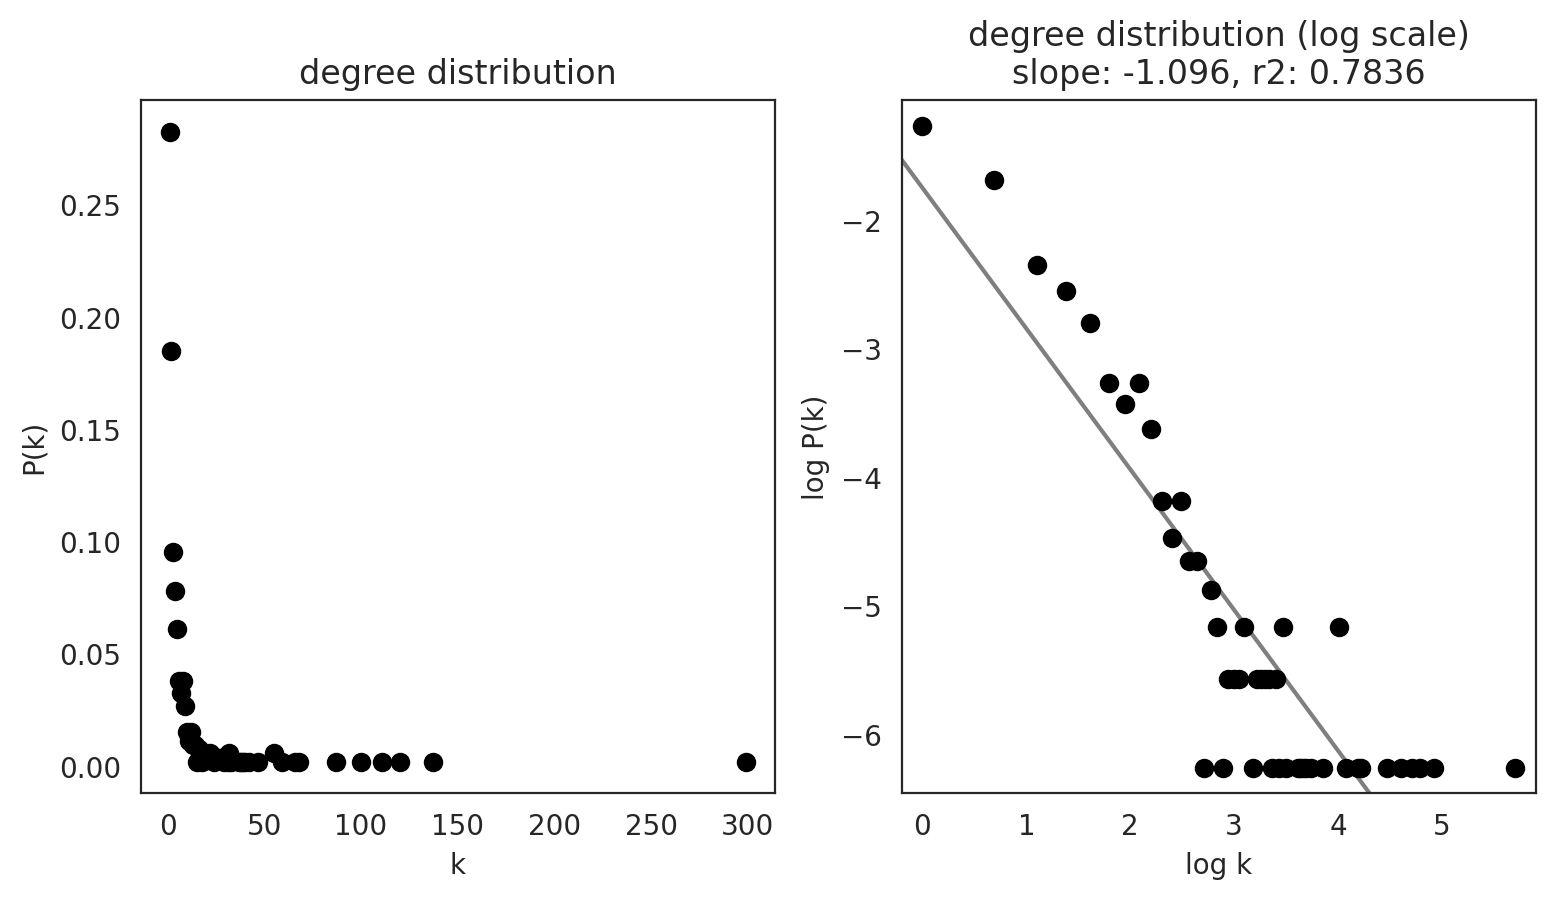

In [8]:
links.plot_degree_distributions(plot_model=True)

In [11]:
links.get_network_score()

In [12]:
links.merged_score.head()

,degree_all,degree_centrality_all,degree_in,degree_centrality_in,degree_out,degree_centrality_out,betweenness_centrality,eigenvector_centrality,cluster
Mlxipl,152,0.334802,7,0.015419,145,0.319383,3456.0,0.734014,B6J
Nav3,15,0.033040,15,0.033040,0,0.000000,0.0,0.561682,B6J
Pou2f3,30,0.066079,0,0.000000,30,0.066079,0.0,0.184537,B6J
Nrxn3,13,0.028634,13,0.028634,0,0.000000,0.0,0.125406,B6J
Ahr,87,0.191630,0,0.000000,87,0.191630,0.0,0.575595,B6J


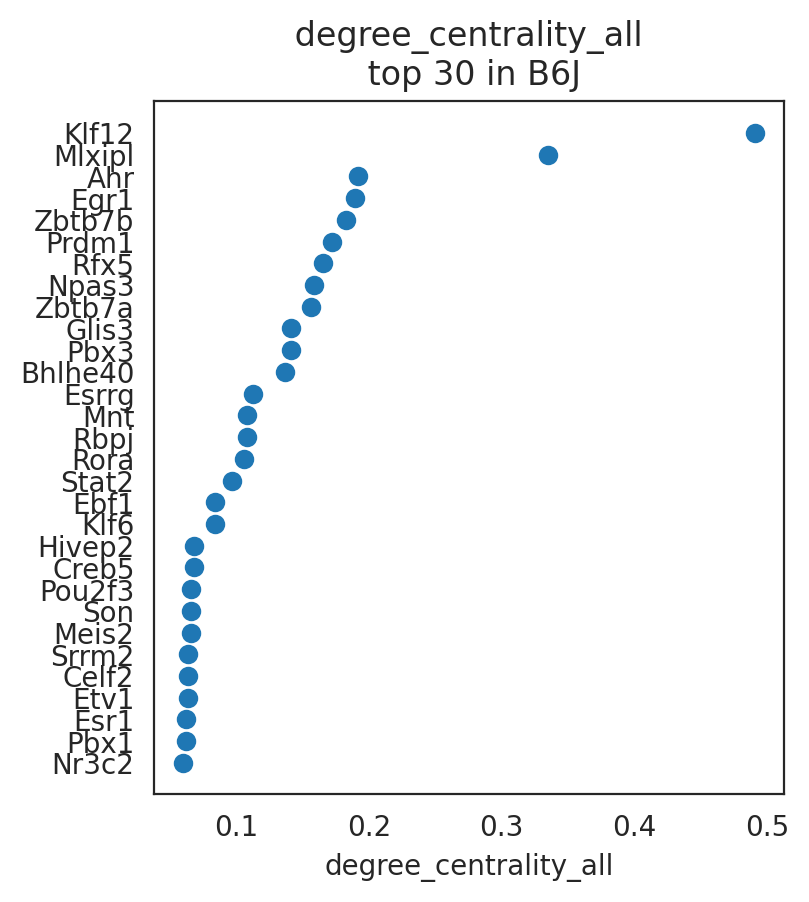

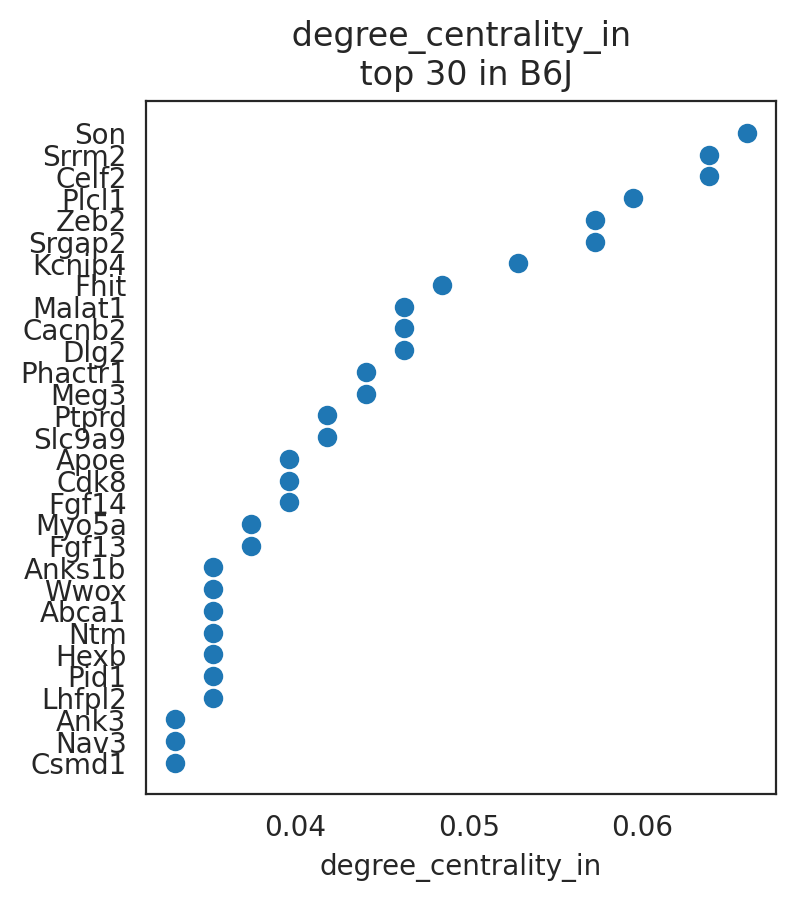

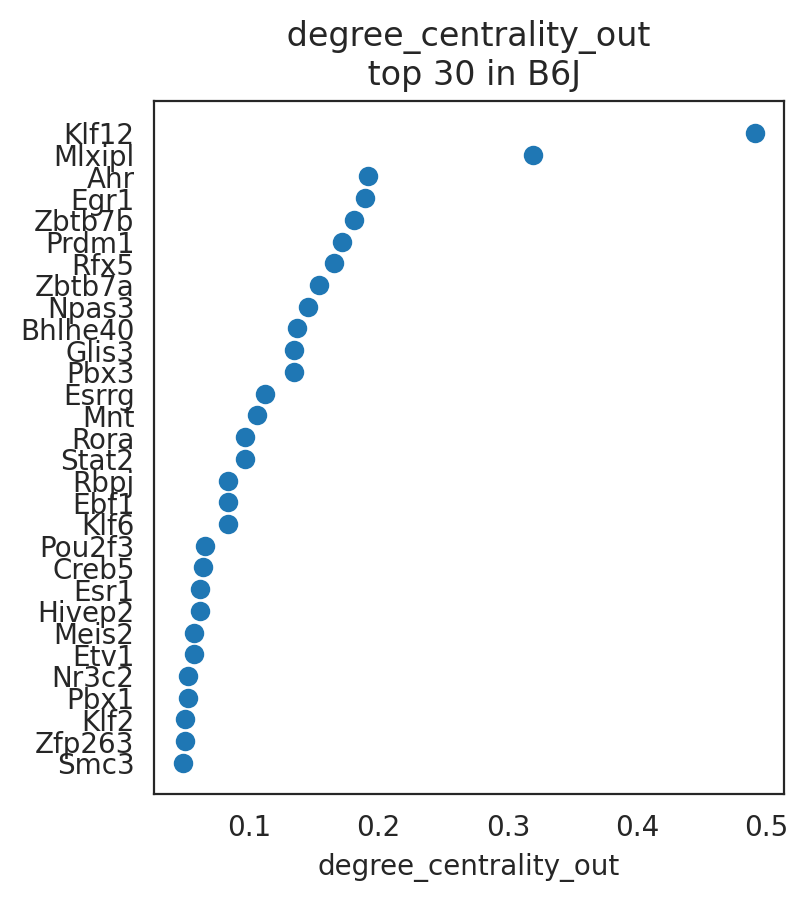

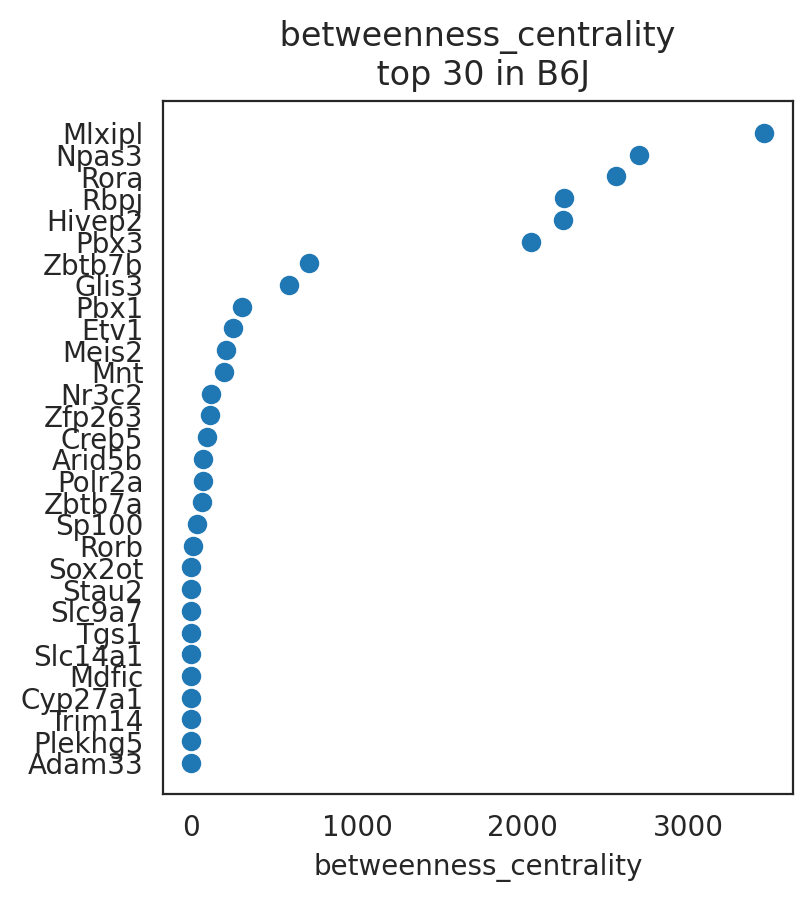

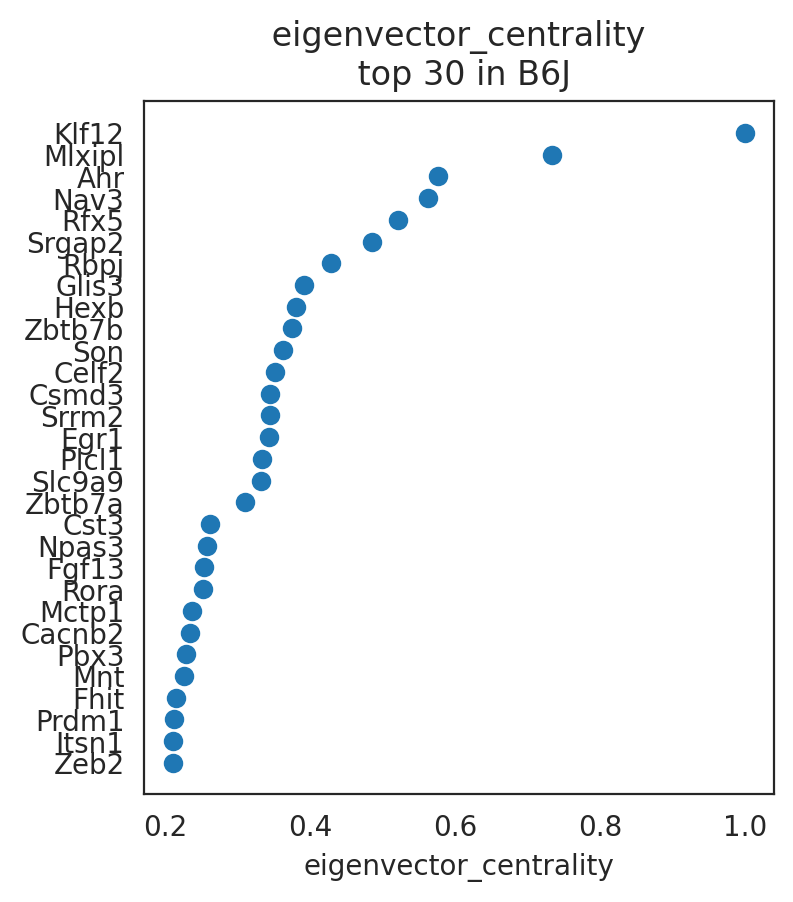

In [13]:
links.plot_scores_as_rank(cluster="B6J", n_gene=30)

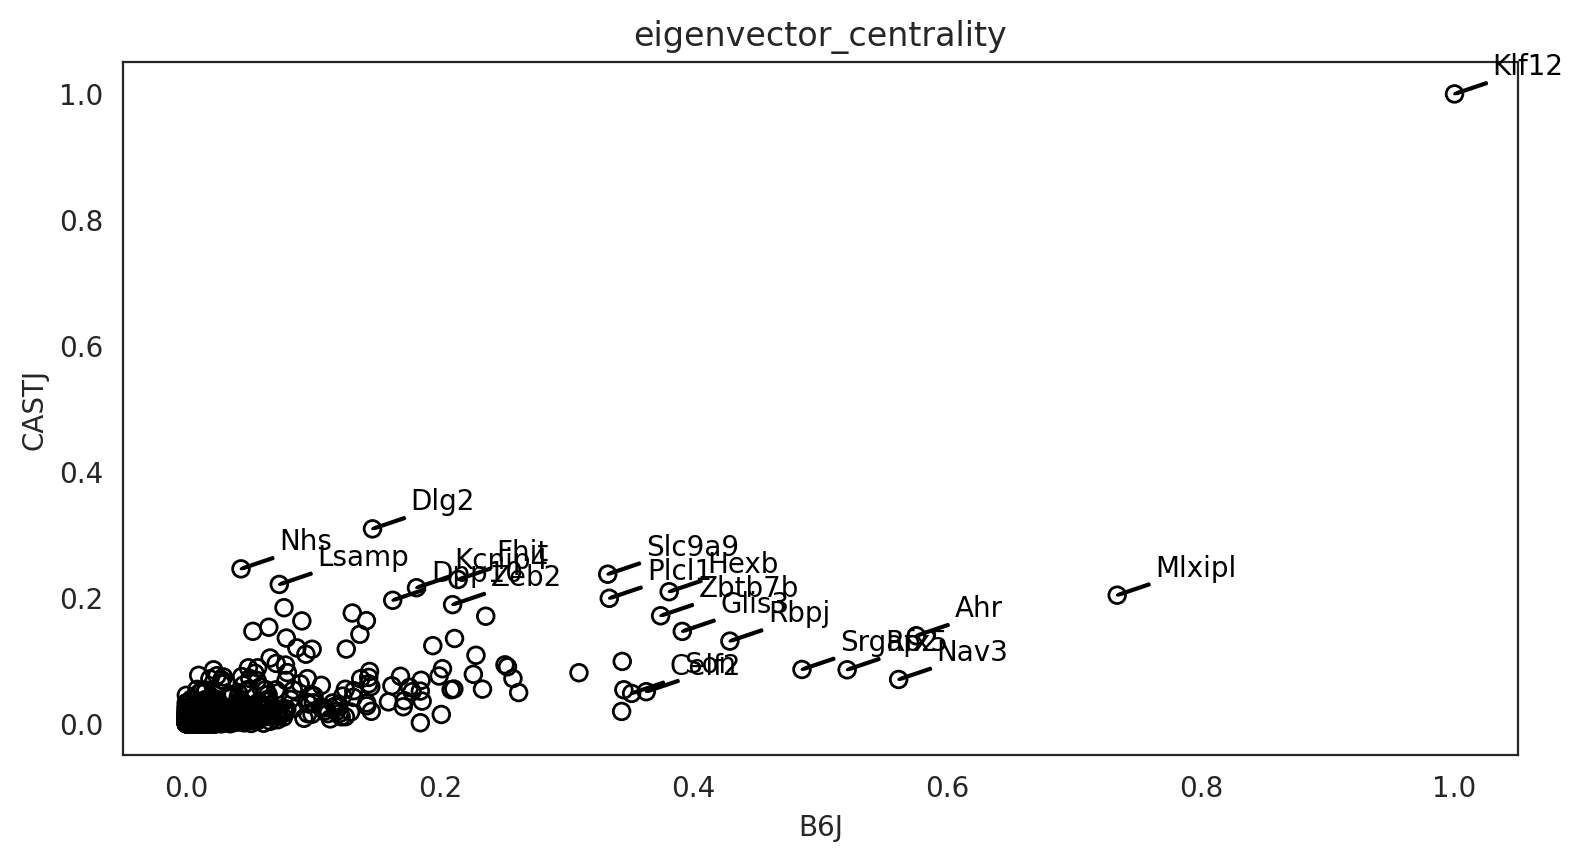

In [14]:
links.plot_score_comparison_2D(
    value="eigenvector_centrality",
    cluster1="B6J", 
    cluster2="CASTJ",
    percentile=98
)

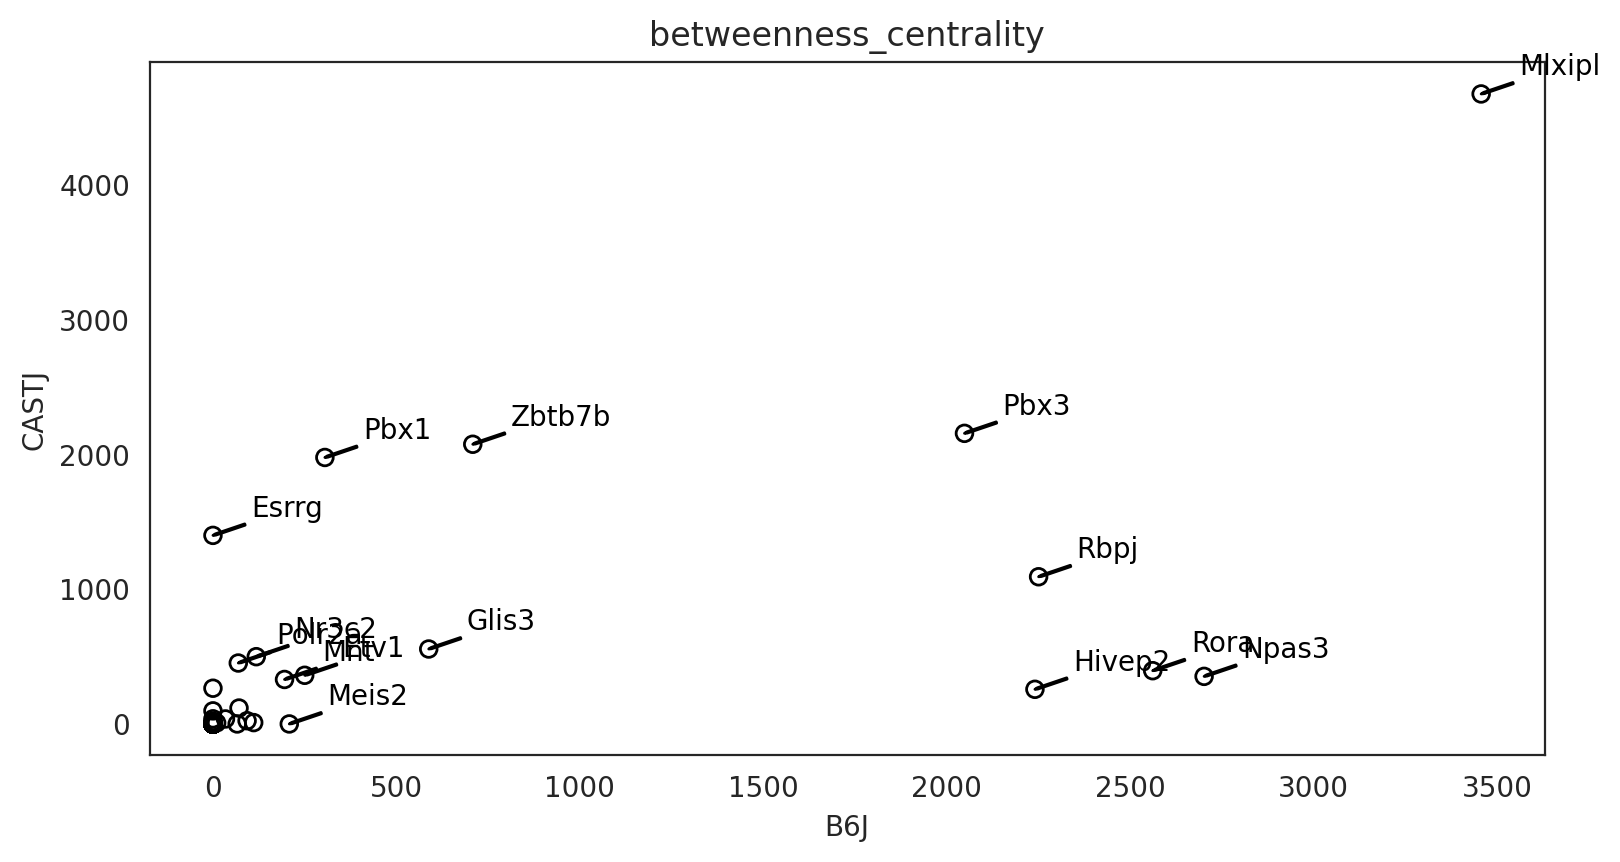

In [15]:
links.plot_score_comparison_2D(
    value="betweenness_centrality",
    cluster1="B6J", 
    cluster2="CASTJ",
    percentile=98
)

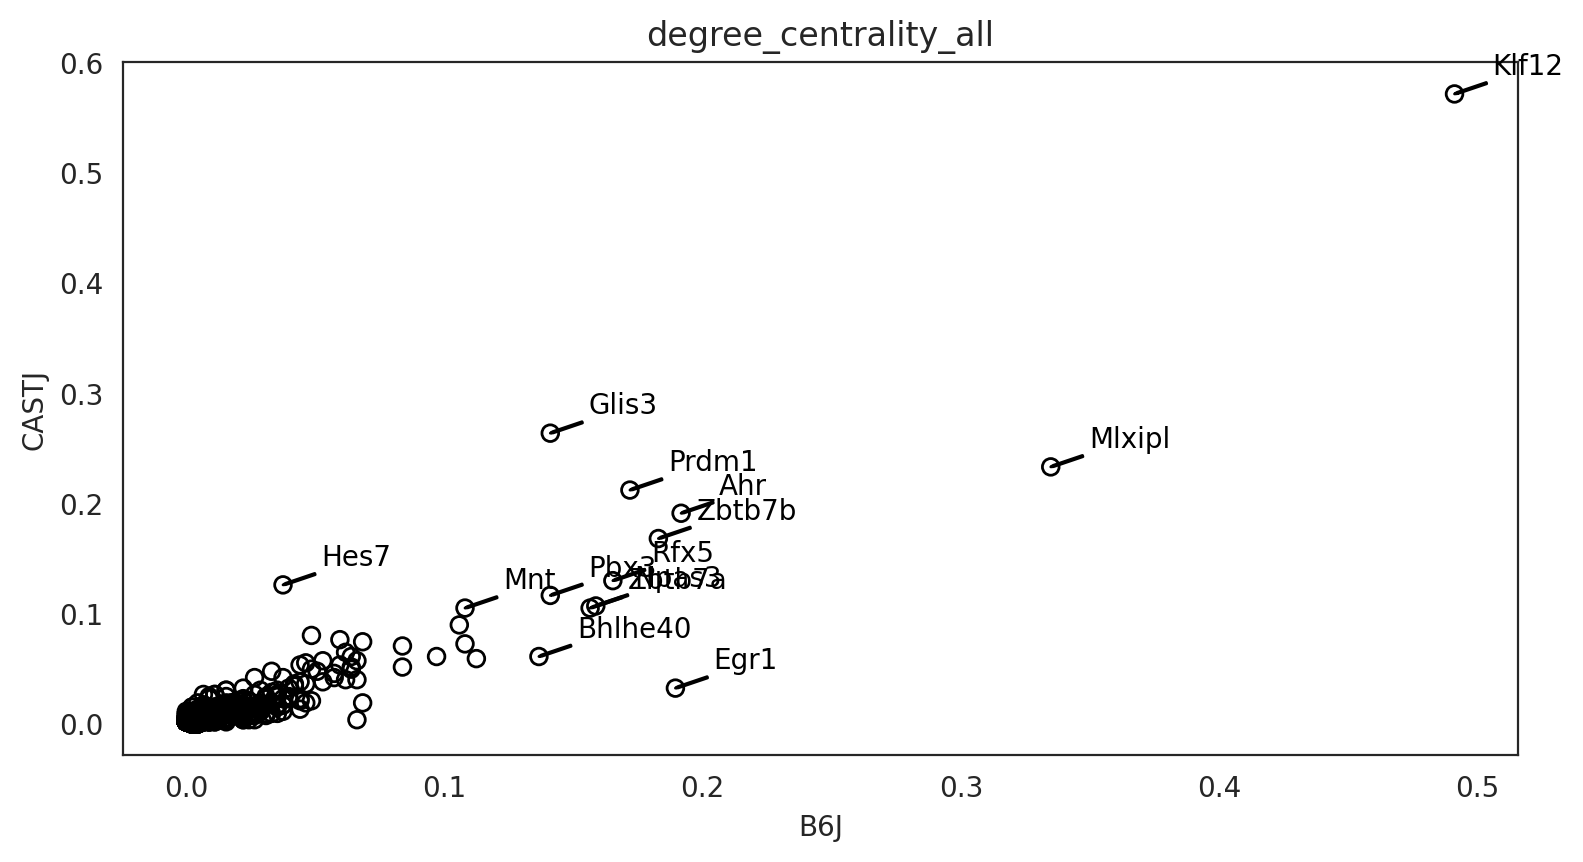

In [16]:
links.plot_score_comparison_2D(
    value="degree_centrality_all",
    cluster1="B6J", 
    cluster2="CASTJ",
    percentile=98
)

Hes7


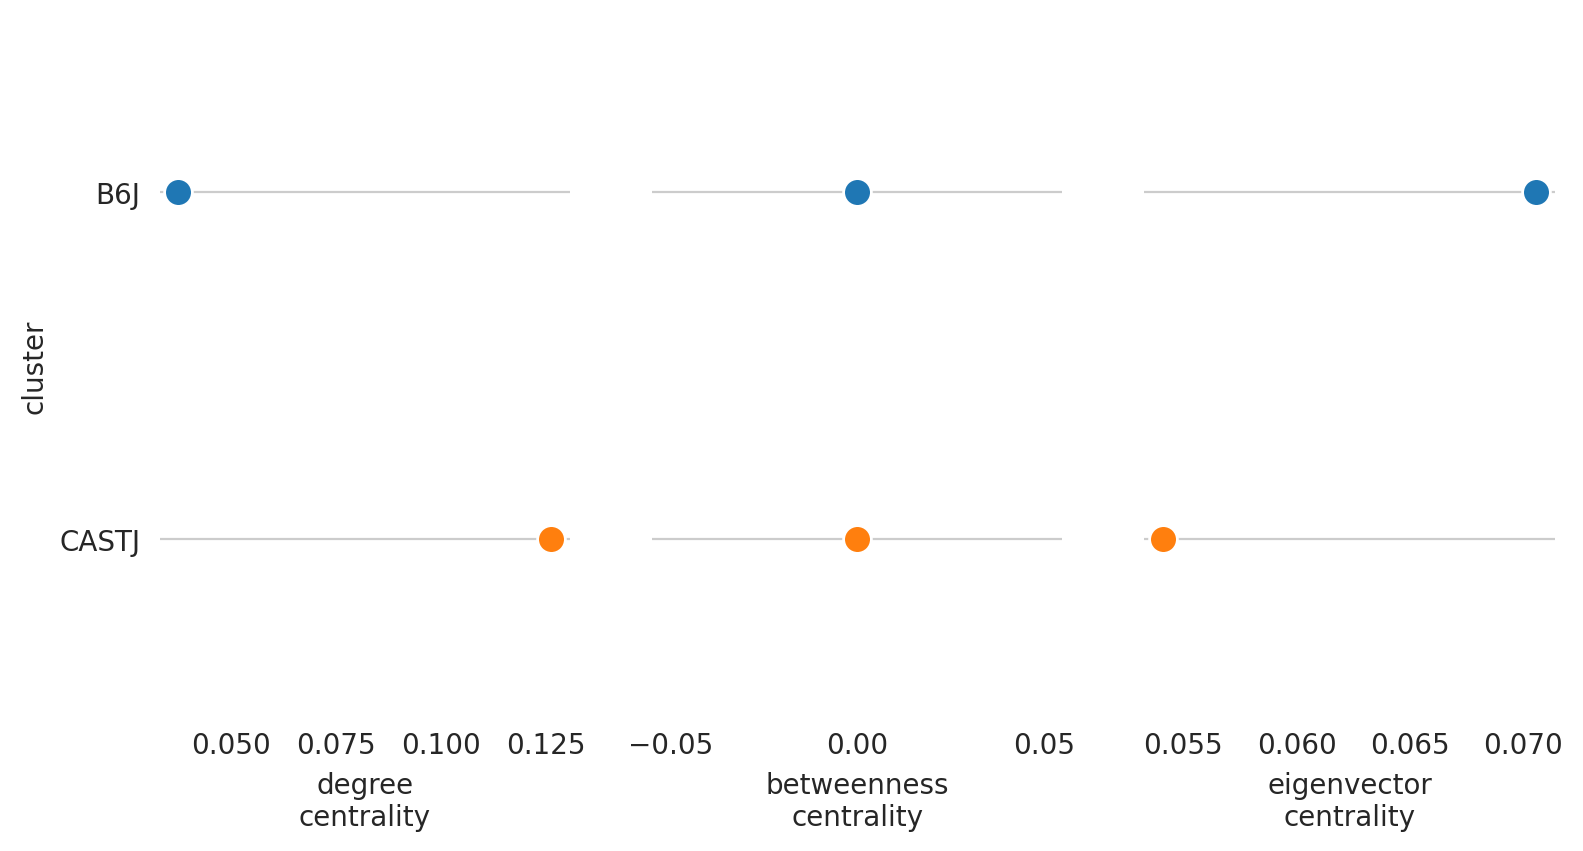

In [18]:
links.plot_score_per_cluster(goi="Hes7")

In [19]:
plt.rcParams["figure.figsize"] = [6, 4.5]

degree_centrality_all


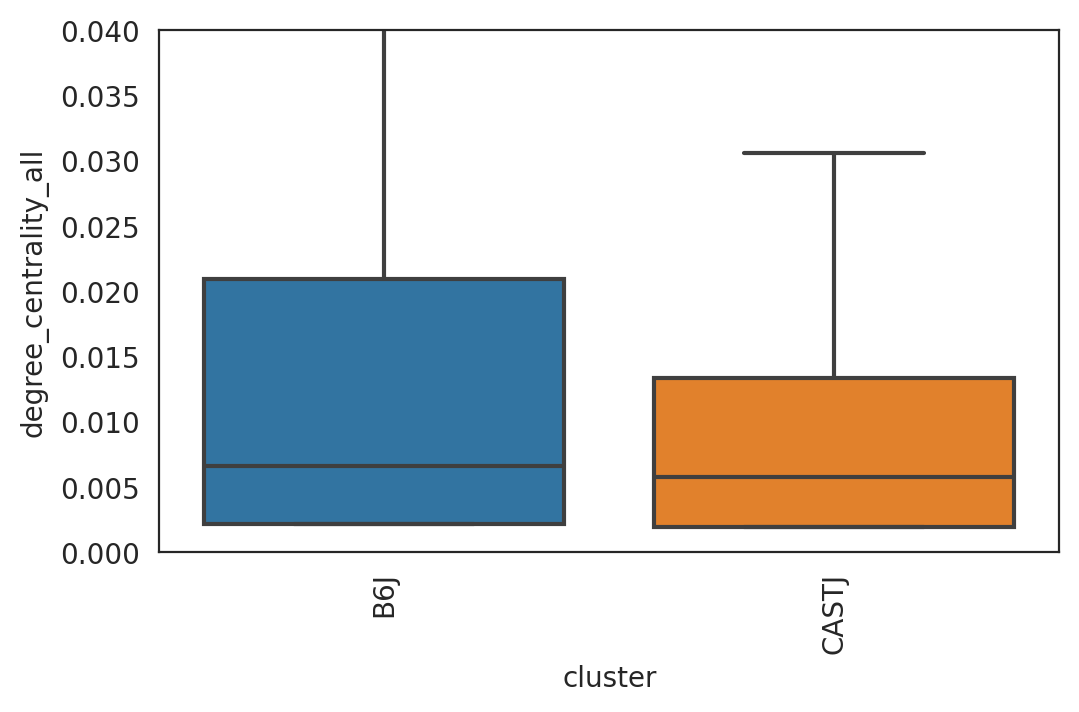

In [20]:
# Plot degree_centrality
plt.subplots_adjust(left=0.15, bottom=0.3)
plt.ylim([0,0.040])
links.plot_score_discributions(values=["degree_centrality_all"],
                               method="boxplot")